# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, WS17

# Assignment 4 - Matrix Decompositions

### Team members : Vajra Ganeshkumar, Jeeveswaran Kishaan


Let us first setup this notebook so that figures and plots can be shown in it.

In [1]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
except NameError:
    pass

import numpy as np
import matplotlib.pyplot as plt
            
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython
import math

**Hint**: Before you start solving the assignment, you might want to check the following *numpy* functions:

```
numpy.linalg.svd
```

## General questions [20 points]

Answer the following questions (in a mathematically sound manner):

### Covariance matrix [4 points]

Given a matrix $X$ of size ${m\times n}$, where $m$ is the number of variables and $n$ is the number of observations, and its mean vector $\bar{X}$, why does the expression

\begin{equation*}
    \frac{(X - \bar{X})(X - \bar{X})^{T}}{n-1}
\end{equation*}

yield the covariance matrix of $X$?

#### Answer  ####

* Covariance matrix of a given matrix is the measure to find out how much the dimensions vary from the mean with respect to each other.
<br>
* For a matrix X of size m x n , where m is the number of variables and n is the number of observations can be described by its mean vector and variance-covariance matrix. 
<br>
* The mean vector consists of the means of each variable and the variance-covariance matrix consists of the variances of the variables along the main diagonal and the covariances between each pair of variables in the other matrix positions
<br>
* The formula for calculating covariance matrix is given by 

\begin{equation*}
    \frac{(X - \bar{X})(X - \bar{X})^{T}}{n-1}
\end{equation*}
<br>
where $\bar{X}$ denotes the mean vector


### Orthonormal bases [4 points]

What are the conditions under which taking the eigendecomposition of a matrix yields an orthonormal basis?

#### Answer ####

1. The matrix should be a square matrix 
2. The matrix should have real, distince eigenvalues
2. The matrix must be a symmetric matrix

If $A$ is symmetric and $v$, $w$ are eigenvectors with different eigenvalues, suppose

$Av = l_1v$ and $Aw = l_2w$. Then using the property of a symmetric matrix where

$$ Av \cdot w = v \cdot Aw$$

we see,

$$ l_1 (v \cdot w) = (l_1v \cdot w) = Av \cdot w = v \cdot Aw = v \cdot l_2w = l_2 (v \cdot w)$$

$l_1 \neq l_2$ and hence $v \cdot w$ should be $0$.

### PCA  [4 points]

When applying principal components analysis, why does each eigenvector point in the direction of the principal components of the data? In addition, why is the contribution of the components to the overall variance related to each eigenvector's eigenvalue?

#### Answer ####

Let $A$ be a matrix containing the data for which we have to calculate the Principal Components. Suppose we want to reduce the dimensionality of our data set, say down to just one dimension. This means picking a unit vector $u$, and replacing each data point, $a_i$, with its projection along this vector, $u^{T}a_i$. We should choose $u$ so that you retain as much of the variation of the data points as possible: if our data points lay along a line and we picked $u$ orthogonal to that line, all the data points would project onto the same value, and thus we would lose almost all the information in the data set! 

So we would like to maximize the variance of the new data values $u^Ta_i$. If the covariance matrix of the original data points $a_i$ was $\Sigma$, the variance of the new data points is $u^T \Sigma u$. As $\Sigma$ is symmetric, the unit vector $u$ which maximizes $u^T \Sigma u$ is nothing but the eigenvector with the largest eigenvalue. 

Similarly, if we want to reduce the dimentionality down to two dimensions, then we can subract the first Principal component $u_1$ from all the data points such that we will get a data set with no variance in the direction of $u_1$ and then find the principal component of this new data set, which we can call as $u_2$. As it turns out, all the vectors $u_1$, $u_2$,… we get from this process are just the eigenvectors of $\Sigma$ in decreasing order of eigenvalues. 

### SVD 1  [4 points]

Show that the eigenvalues of $A^TA$ and $AA^T$ and equal. How are the eigenvectors of $AA^T$ and $A^TA$ related?

### Answer ###


Let $\lambda$ be a non-zero eigenvalue of $AA^{T}$ and $q$ be the eigenvector corresponding to $\lambda$.
Then 

$$ (AA^{T}) q = \lambda q $$ 

Premultiplying both sides by $A^{T}$ , we have 

$$ A^{T} (AA^{T}) q = (A^{T}A) \cdot (A^{T} q) =
\lambda \cdot (A^{T}q) $$

Therefore $\lambda$ is an eigenvalue of $A^{T} A$ with $A^{T} q$ as the corresponding eigenvector.

The eigenvectors of $AA^{T}$ are the left singular vectors of A and the eigenvectors of $A^{T}A$ are the right singular vectors of A. These can be obtained from the Singular value decomposition of A. 

$$ U,s,V^{T} = svd(A) $$

Then $U$ will have the eigenvectors of $AA^{T}$ and $V$ will have the eigenvectors of $A^{T}A$.


### SVD 2  [4 points]

If $A$ is a rotation matrix, what do we know about the singular values in its SVD?

#### Answer  ####

Given $A$ is a rotation matrix, its singular values would be all identical and equal to 1. 

Since $A$ is a rotation matrix, its orthogonal and $A^{T}A = I$. Singular values of A are the eigenvalues of $A^{T}A$ and they are all equal to $1$ (Since the eigenvalues of a diagonal matrix are the values in the main diagonal of the matrix). An example of this statement is shown below.

In [2]:
A = np.array([[math.cos(60), math.sin(-60), 0],
              [math.sin(60), math.cos(60) , 0],
              [0           , 0            , 1]])

U,s,Vt = np.linalg.svd(A)
print s # Printing the singular values of rotation matrix A

[ 1.  1.  1.]


## Fitting lines to point clouds [60 points]

Before your start with the assignment, read [this article about least squares fitting](http://mathworld.wolfram.com/LeastSquaresFitting.html) and this [lecture about linear least squares and matrix decompositions](http://classes.soe.ucsc.edu/cmps290c/Spring04/paps/lls.pdf). Now, use the singular value decomposition for fitting lines to the given point clouds in all of the following tasks.

**Hint**: In all problems below, the point clouds are split so that they correspond to individual lines; however, this does not mean that you should fit a line to each point cloud separately. In other words, all of the problems have an underlying structure that we want to exploit in this exercise.

### Detecting a hallway [20 points]

Let's suppose that a robot is driving in a hallway and its Kinect obtains the following point cloud:

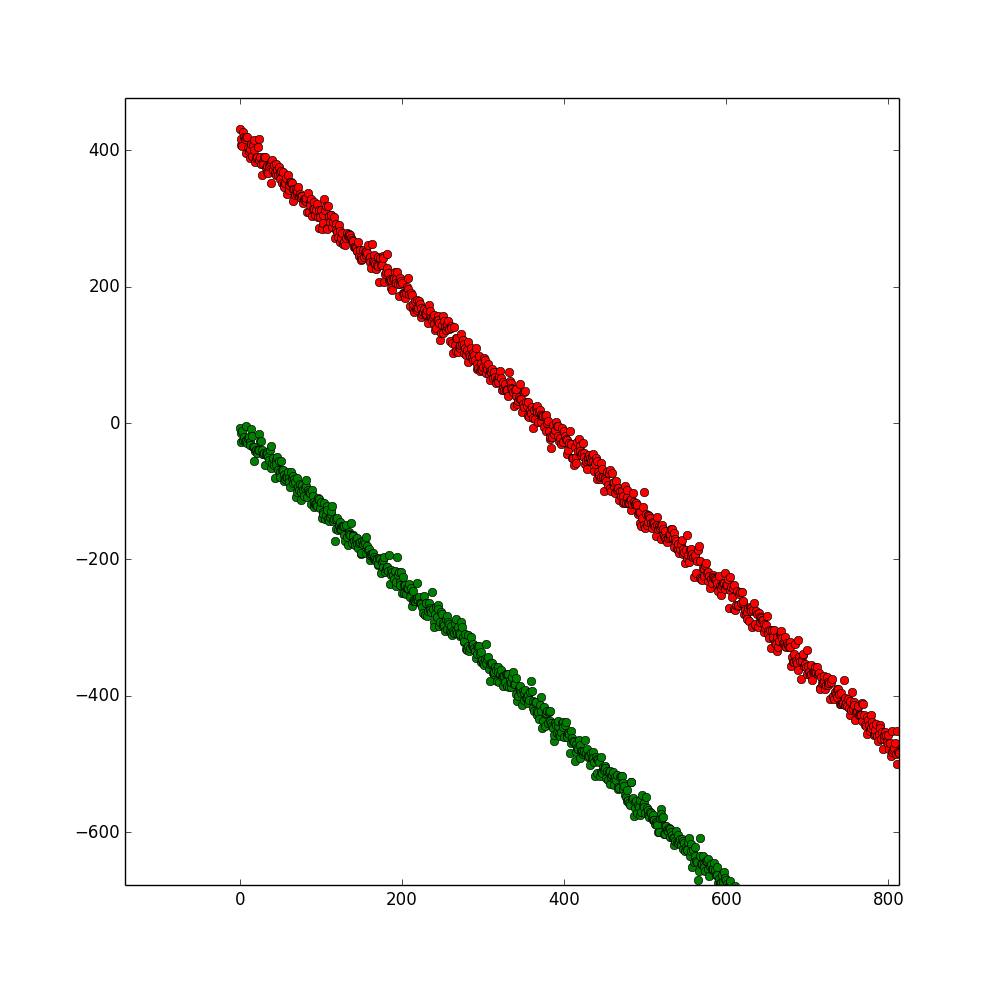

In [3]:
IPython.core.display.Image("images/hallway.png", embed=True)

Your task is to fit a pair of parallel lines based on the points generated by the robot's Kinect.

#### Mathematical model [10 points]

Before we start implementing anything, we need to formalise our problem. Your first task is thus formulating the given line fitting problem mathematically. Please write your formulation in the cell below.

#### write your formulation here ####

###  Formulation  ###
Considering the task of fitting two parallel lines , line $l_1$ and $l_2$ to the two data set points which are given by {P i }, i = 1, ..., p and {Q j }, j = 1, ..., q.
If $ (n_1 , n_2 )$ is the normal vector of the first line, then the second line must also have the normal vector $ (n_1, n_2)$ in order to be parallel. The equations for the lines are thus
<br>

$$ c_1 + n_{1}{x}+ n_{2}{y} = 0$$
$$ c_2 + n_{1}{x}+ n_{2}{y} = 0$$
$$ n_{1}^2 + n_{2}^2 = 1$$
<br>

Where $n_1$ and $n_2$ are normal vectors
Here, the vector $n = (n_1 n_2)^T$ are orthonormal to the lines and each residual (error) is 

$$r_{i} = c + n_{1} \cdot x_{pi} + n_{2} \cdot y_{pi}$$ 

and 

$$r_{i} = c + n_{1} \cdot x_{qi} + n_{2} \cdot y_{qi}$$

<br>
To find $c,n_1,n_2$ by satisfying these conditions:
$$||r_{2}^2|| = r_{1}^2 + ... + r_{m} = min$$

$$ n_{1}^2 + n_{2}^2 = 1$$
<br>
And this can be written in the matrix form as,

$$ \begin{bmatrix} r_{1} \\  r_{2} \\ r_{3} \\ \cdot \\ \cdot \\ r_{p+q} \\ \end{bmatrix} = \begin{bmatrix} 1 & 0 & x_{p1}  & y_{p1} \\1 & 0 & x_{p2}  & y_{p2} \\ \cdot \\ \cdot \\ 1 & 0 & x_{pp}  & y_{pp} \\ 0 & 1 & x_{q1} & y_{q1}\\ 0 & 1 & x_{q2} & y_{q2} \\  \cdot \\ \cdot \\ 0 & 1 & x_{qq}  & y_{qq}\\ \end{bmatrix} \begin{bmatrix} c1\\ c2 \\ n1\\n2 \end{bmatrix} $$

Therefore $Ax = r$ <br>

$QR$ decomposition of $A$ gives us two matrices i.e,$Q$ orthonormal matrix, $R$ upper triangular matrix, so<br>

$$ A = QR  $$

$$ QRx = r $$  <br>

Multiplying $Q^{T}$ on both sides <br>

$$ Q^{T}QRx = Q^{T}r$$ Since Q is orthonormal, we get <br>

$$ Rx = Q^{T}r$$



<br>

Since the nonlinear constraint only involves two unknowns we now have to solve<br>

<br> 

$$ \begin{bmatrix} r_{22} & r_{23}\\ 0 & r_{33} \\ \end{bmatrix} \begin{bmatrix} n_{1} \\ n_{2}  \end{bmatrix} \approx \begin{bmatrix} 0\\ 0 \end{bmatrix} $$



The reduction of this matrix now implicitly imposes the constraint $n_1^{2} + n_2^{2}= 1$ ensuring the residuals are exactly the normal distances of the points to the line.<br>

<br>

The value of the minimum residual is the smallest singular value of A and the solution is given by the corresponding singular vector <br>
<br>

We can thus determine $n_{1}$ and $n_{2}$ by a singular value decomposition of a 2 $\times$ 2 matrix. <br>
<br>

We can compute the values of $c_1$ and $c_2$ by back substitution or by finding the least square of matrix $R$ and $n$. 

#### Implementation [10 points]

After formalising the problem mathematically, your task is to implement your solution and obtain the parameters of the parallel lines that go through the point clouds.

The point clouds of the two lines are stored in *data/P1.npy* and *data/Q1.npy*, so you need to use those two files here. After obtaining the parameters of the lines, plot the lines together with the point clouds to verify that you have indeed found the correct parameters.

C1 =  -7.94063095031
C2 =  279.888026018
n1 = -0.741974844587
n2 =  -0.670427721682


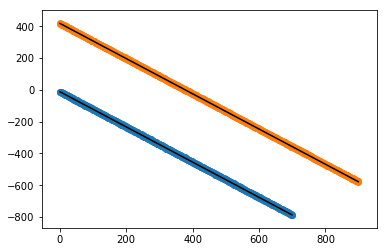

In [4]:
def clsq(A, dim):
    #’’’CLSQ solves the constrained least squares problem
    #A * [c n]’ = 0 subject to norm(n,2) = 1
    #len(n) = dim
    #’’’
    m, p = A.shape
    if p < dim + 1:
        #implies that the number of equations are more than unknowns
        print "not enough unknowns"
        return None
    if m < dim:
        #implies that there are not enough equations
        print "not enough equations"
        return None
    
    # Getting the min shape of the matrix A
    m = min(m, p)
    #doing the QR decomposition on A
    _, R = numpy.linalg.qr(A, mode="complete")
    #getting the svd transformation of the last two equations of the R matrix
    _, _, VT = numpy.linalg.svd(R[p-dim-1:m, p-dim-1:p])
    n = VT[dim, :]
    #c can be found by finding the least square of r and n
    c = numpy.linalg.lstsq(-R[0:p-dim-1, 0:p-dim-1], R[0:p-dim-1, p-dim-1:p].dot(n))[0]
    return c, n

def compute_parallel_lines(data, data1):
    # Reading in the data into P and Q 
    px = np.array(data)[:,0]
    Px = np.array(data) [:,0][numpy.newaxis].T
    py = np.array(data)[:,1]
    Py = np.array(data) [:,1][numpy.newaxis].T
    qx = np.array(data1) [:,0]
    Qx = np.array(data1) [:,0][numpy.newaxis].T
    qy = np.array(data1)[:,1]
    Qy = np.array(data1) [:,1][numpy.newaxis].T

    #building the A matrix
    A1 = numpy.hstack((numpy.ones(len(Px))[numpy.newaxis].T, numpy.zeros(len(Px))[numpy.newaxis].T,Px, Py))
    A2 = numpy.hstack((numpy.zeros(len(Qx))[numpy.newaxis].T, numpy.ones(len(Qx))[numpy.newaxis].T,Qx, Qy))
    A = numpy.vstack((A1, A2))
    
    #extracting the c and n values from A using the constrained least square 
    #function (clsq)
    c, n = clsq(A, 1)
    c1 = c[0]
    c2 = c[1]
    n1 = n[0]
    n2 = n[1]
    
    print 'C1 = ', c1 
    print 'C2 = ',c2
    print 'n1 =',n1
    print 'n2 = ', n2
    
    #using the equations for parallel lines to get the values of calculated y
    a = -(c1+n1*px)/n2
    b = -(c2+n1*qx )/n2
    y = px
    y1 = qx
    plt.plot(y,a,'black') #p
    plt.plot (y1,b, 'black') #q

    plt.scatter(data[:,0],data[:,1])   #p
    plt.scatter(data1[:,0],data1[:,1]) #q
    plt.show()
    
    
first_line = np.load ('data/P1.npy')
second_line = np.load('data/Q1.npy')

compute_parallel_lines(first_line, second_line)

### Detecting a corner [20 points]

At the end of the hallway, our robot detects a dramatic change in the point cloud.

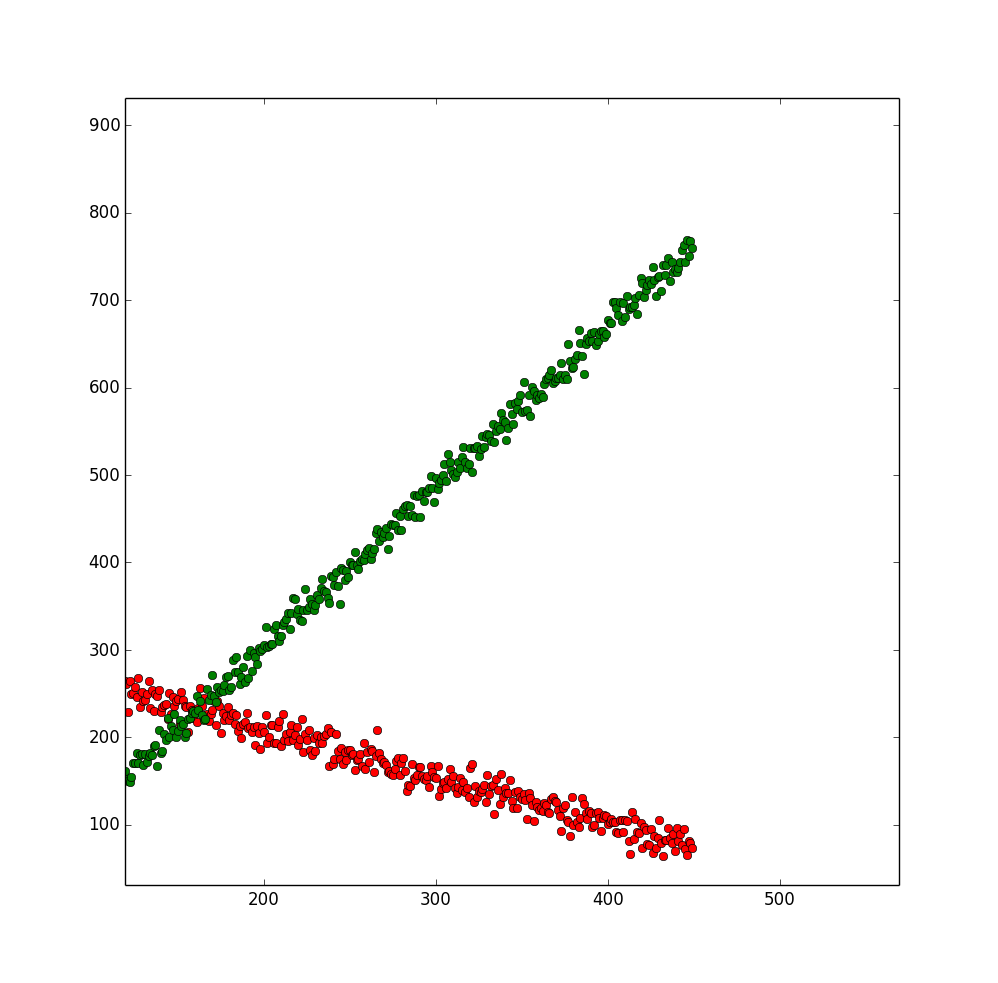

In [5]:
IPython.core.display.Image("images/corner.png", embed=True)

Your task is to fit a pair of perpendicular lines based on the points generated by the robot's Kinect.

#### Mathematical model [10 points]

As before, we need to formalise our problem before we delve into coding. Please formulate the line fitting problem in the cell below.

#### write your formulation here ####

###  Formulation  ###

Considering the task of fitting two perpendicular lines , line $l_{1}$ and $l_{2}$ to the two data set points which are given by $P_{i}$, $i = 1$, ..., $p$ and  $Q_{j}$, $j = 1$, ..., $q$.

If $ (n_1 , n_2 )$ is the normal vector of the first line, then the second line must have the normal vector $(-n_2, n_1)$ in order to be orthogonal. The equations for the lines are thus

<br>

$$ c_{1} + n_{1}{x}+ n_{2}{y} = 0$$

$$ c_{2} - n_{2}{x}+ n_{1}{y} = 0 $$

$$ n_{1}^2 + n_{2}^2 = 1$$

<br>

Where $n_1$ and $n_2$ are normal vectors

Here, the vector $n_{1}$, $n_{2}$ are orthonormal to the lines and each residual (error) is 

$$r_{i} = c_{1} + n_{1}x_{pi} + n_{2}y_{pi}$$ and

$$r_{j} = c_{2} - n_{2}x_{qj} + n_{1}y_{qj}$$

<br>

We can find $c_1, c_2, n_1, n_2$ such that it satisfies the below conditions:

$$||r_{2}^2|| = r_{1}^2 + ... + r_{m} = min$$

$$ n_{1}^2 + n_{2}^2 = 1$$

<br>

And this can be written in the matrix form as,



$$ \begin{bmatrix} 1 & 0 & x_{p1}  & y_{p1} \\1 & 0 & x_{p2}  & y_{p2} \\ \cdot \\ \cdot \\ 1 & 0 & x_{pi}  & y_{pi} \\ 0 & 1 & y_{q1} & -x_{q1}\\ 0 & 1 & y_{q2} & -x_{q2} \\  \cdot \\ \cdot \\ 0 & 1 & y_{qj}  & -x_{qj}\\ \end{bmatrix} \begin{bmatrix} c1\\ c2 \\ n1\\n2 \end{bmatrix} = \begin{bmatrix} r_{1} \\  r_{2} \\ r_{3} \\ \cdot \\ \cdot \\ r_{p+q} \\ \end{bmatrix} $$

<br>

let $$ A = \begin{bmatrix} 1 & 0 & x_{p1}  & y_{p1} \\1 & 0 & x_{p2}  & y_{p2} \\ \cdot \\ \cdot \\ 1 & 0 & x_{pi}  & y_{pi} \\ 0 & 1 & y_{q1} & -x_{q1}\\ 0 & 1 & y_{q2} & -x_{q2} \\  \cdot \\ \cdot \\ 0 & 1 & y_{qj}  & -x_{qj}\\ \end{bmatrix} x = \begin{bmatrix} c1\\ c2 \\ n1\\n2 \end{bmatrix}$$

and 

$$r = \begin{bmatrix} r_{1} \\  r_{2} \\ r_{3} \\ \cdot \\ \cdot \\ r_{p+q} \\ \end{bmatrix} $$

<br>

Therefore $Ax = r$ <br>

$QR$ decomposition of $A$ gives us two matrices i.e,$Q$ orthonormal matrix, $R$ upper triangular matrix, so<br>

$$ A = QR  $$

$$ QRx = r $$  <br>

Multiplying $Q^{T}$ on both sides <br>

$$ Q^{T}QRx = Q^{T}r$$ Since Q is orthonormal, we get <br>

$$ Rx = Q^{T}r$$



<br>

Since the nonlinear constraint only involves two unknowns we now have to solve<br>

<br> 

$$ \begin{bmatrix} r_{22} & r_{23}\\ 0 & r_{33} \\ \end{bmatrix} \begin{bmatrix} n_{1} \\ n_{2}  \end{bmatrix} \approx \begin{bmatrix} 0\\ 0 \end{bmatrix} $$



The reduction of this matrix now implicitly imposes the constraint $n_1^{2} + n_2^{2}= 1$ ensuring the residuals are exactly the normal distances of the points to the line.<br>

<br>

The value of the minimum residual is the smallest singular value of A and the solution is given by the corresponding singular vector <br>
<br>

We can thus determine $n_{1}$ and $n_{2}$ by a singular value decomposition of a 2 $\times$ 2 matrix. <br>
<br>

We can compute the values of $c_1$ and $c_2$ by back substitution or by finding the least square of matrix $R$ and $n$. 

#### Implementation [10 points]

Now that you have formalised the problem, please implement your solution to obtain the parameters of the perpendicular lines that go through the point clouds.

The point clouds of the two lines are stored in *data/P2.npy* and *data/Q2.npy*, so you need to use those two files here. Once again, plot the lines together with the point clouds to verify that you have indeed found the correct parameters.

C1 =  7.72906894689
C2 =  -29.550314376
n1 = -0.664093795839
n2 =  -0.747649269596


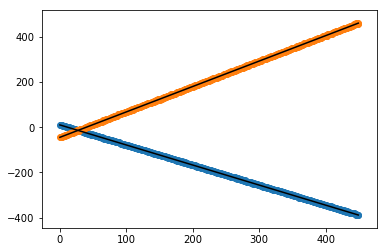

In [6]:
def clsq(A, dim):
    #’’’CLSQ solves the constrained least squares problem
    #A * [c n]’ = 0 subject to norm(n,2) = 1
    #len(n) = dim
    #’’’
    
    #reading in the dimentions of A
    m, p = A.shape
    if p < dim + 1:
        #equations are more than unknowns
        print"not enough unknowns"
        return None
    if m < dim:
        #unknowns are more than equations
        print "not enough equations"
        return None
    
    m = min(m, p)
    #QR decomposition of A
    _, R = numpy.linalg.qr(A, mode="complete")
    #getting the svd transformation of the last two equations of the R matrix
    _, _, VT = numpy.linalg.svd(R[p-dim-1:m, p-dim-1:p])
    n = VT[dim, :]
    #c can be found by finding the least square of r and n
    c = numpy.linalg.lstsq(-R[0:p-dim-1, 0:p-dim-1], R[0:p-dim-1, p-dim-1:p].dot(n))[0]
    return c, n

def compute_perpendicular_lines(data, data1):
    # Reading in the data into P and Q 
    px = np.array(data)[:,0]
    Px = np.array(data) [:,0][numpy.newaxis].T
    qx = np.array(data1) [:,0]
    Qx =np.array(data1) [:,0][numpy.newaxis].T
    py = np.array(data)[:,1]
    Py = np.array(data) [:,1][numpy.newaxis].T
    qy = np.array(data1)[:,1]
    Qy = np.array(data1) [:,1][numpy.newaxis].T

    #building the A matrix
    A1 = numpy.hstack((numpy.ones(len(Px))[numpy.newaxis].T, numpy.zeros(len(Px))[numpy.newaxis].T,Px, Py))
    A2 = numpy.hstack((numpy.zeros(len(Qx))[numpy.newaxis].T, numpy.ones(len(Qx))[numpy.newaxis].T,Qy, -Qx))
    A = numpy.vstack((A1, A2))
    
    
    #extracting the c and n values from A using the constrained least square 
    #function (clsq)
    c, n = clsq(A, 1)
    c1 = c[0]
    c2 = c[1]
    n1 = n[0]
    n2 = n[1]
    print 'C1 = ', c1 
    print 'C2 = ',c2
    print 'n1 =',n1
    print'n2 = ', n2
    
    #using the equations for parallel lines to get the values of calculated y
    a = -(c1+n1*px)/n2
    b = (-c2 +n2*qx )/n1
    y = px
    y1 = qx
    plt.plot(y,a,'black') #p
    #plt.plot (b,y1)

    plt.plot (y1,b, 'black') #q
    #plt.show()
    plt.scatter(data[:,0],data[:,1])     #p
    plt.scatter(data1[:,0],data1[:,1]) #q
    plt.show()
    
first_line = np.load ('data/P2.npy')
second_line = np.load ('data/Q2.npy')
compute_perpendicular_lines(first_line, second_line)

### Detecting a table [20 points]

When our robot turns at a table nearby, the point cloud it receives is the following:

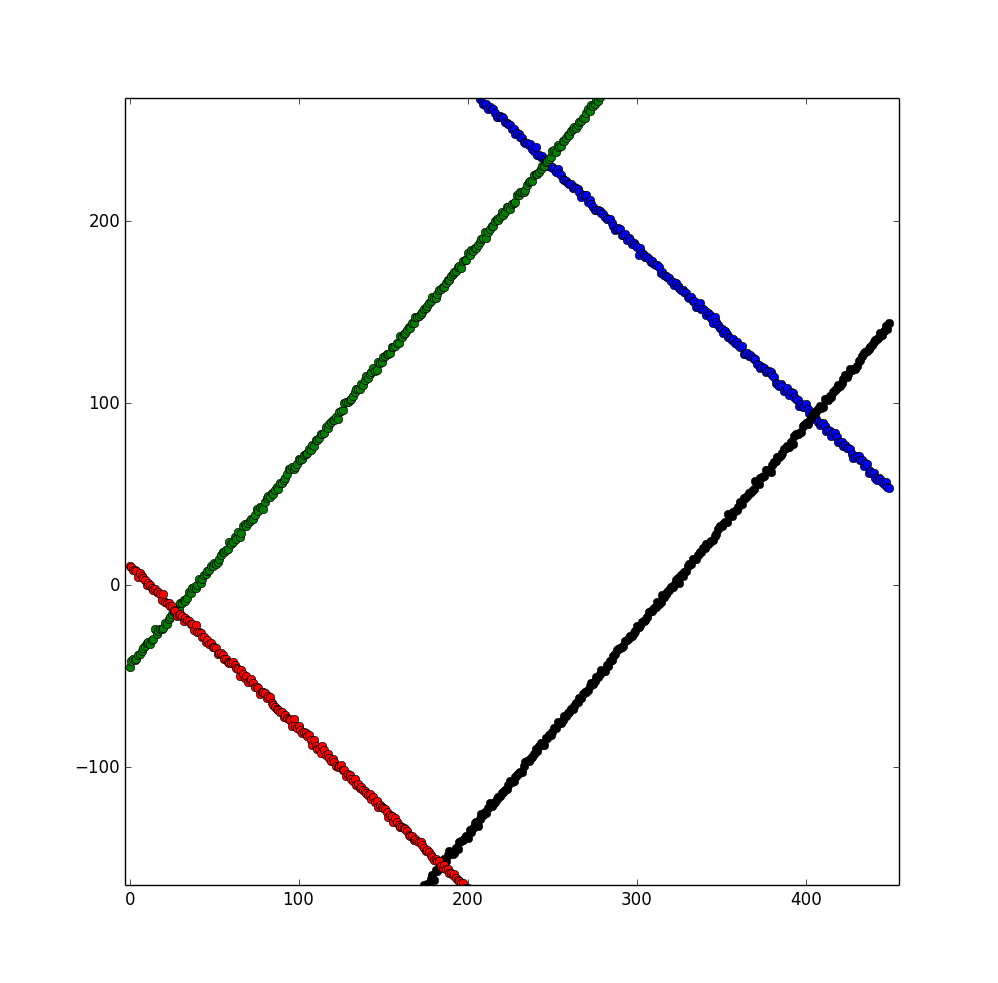

In [7]:
IPython.core.display.Image("images/rectangle.png", embed=True)

This time, your task is to fit four lines (which basically form a rectangle) based on the points generated by the robot's Kinect.

#### Mathematical model [10 points]

Once again, we cannot proceed without formulating the problem mathematically. Formulate the line fitting problem in the cell below.

#### write your formulation here ####


###  Formulation  ###

Considering the task of fitting set of parallel lines and a set of perpendicular lines, line $l_{1}$, $l_{2}$, $l_{3}$ and $l_{4}$ to the data set points which are given by $P_{i}$, $i = 1$, ..., $p$ , $Q_{j}$, $j = 1$, ..., $q$, $R_{k}$, $k = 1$, ..., $r$ and $S_{l}$, $l = 1$, ..., $s$

If $ (n_1 , n_2 )$ is the normal vector of the first line and third line, then the second line and fourth linemust have the normal vector $ (-n_2, n_1)$ in order to be orthogonal. The equations for the lines are thus

<br>

$$ c_{1} + n_{1}{x}+ n_{2}{y} = 0$$

$$c_{2} - n_{2}{x}+ n_{1}{y} = 0 $$

$$ c_{3} + n_{1}{x}+ n_{2}{y} = 0$$

$$c_{4} - n_{2}{x}+ n_{1}{y} = 0 $$

$$ n_{1}^2 + n_{2}^2 = 1$$

<br>

Where $n_1$ and $n_2$ are normal vectors

Here, the vector $n_{1} ,n_{2}$ are orthonormal to the lines and each residual (error) is 

$$r_{i} = c_{1} + n_{1}x_{pi} + n_{2}y_{pi}$$ 

$$r_{j} = c_{2} - n_{2}x_{qj} + n_{1}y_{qj}$$

$$r_{k} = c_{2} - n_{2}x_{rk} + n_{1}y_{rk} $$ 

$$r_{l} = c_{2} - n_{2}x_{sl} + n_{1}y_{sl}$$

<br>

We can find c1,c2,c3,c4,n1,n2 such that it satisfies the below conditions:

$$||r_{2}^2|| = r_{1}^2 + ... + r_{m} = min$$

$$ n_{1}^2 + n_{2}^2 = 1$$

<br>

And this can be written in the matrix form as,


$$ \begin{bmatrix} 1 & 0 & 0 & 0 & x_{p1}  & y_{p1} \\1 & 0  & 0 & 0 &x_{p2}  & y_{p2} \\ \cdot \\ \cdot \\ 1 & 0 & 0 & 0 & x_{pi}  & y_{pi} \\ 0 & 1 & 0 & 0 & y_{q1} & -x_{q1}\\ 0 & 1 & 0 & 0 & y_{q2} & -x_{q2} \\  \cdot \\ \cdot \\ 0 & 1  & 0 & 0 & y_{qj}  & -x_{qj}\\  0 & 0 &1 &0 & x_{r1}  & y_{r1} \\   0  & 0 & 1 & 0 &x_{r2}  & y_{r2} \\ \cdot \\ \cdot \\  0 & 0 & 1& 0 & x_{r}  & y_{r} \\ 0 & 0 & 0 & 1 & y_{s1} & -x_{s1}\\ 0  & 0 & 0 & 1& y_{s2} & -x_{s2} \\  \cdot \\ \cdot \\ 0   & 0 & 0 & 1& y_{s}  & -x_{s}\\ \end{bmatrix} \begin{bmatrix} c1\\ c2 \\c3 \\c4 \\ n1\\n2 \end{bmatrix} = \begin{bmatrix} r_{1} \\  r_{2} \\ r_{3} \\ \cdot \\ \cdot \\ r_{p+q+r+s} \\ \end{bmatrix} $$

<br>

Let 

$$ A = \begin{bmatrix} 1 & 0 & 0 & 0 & x_{p1}  & y_{p1} \\1 & 0  & 0 & 0 &x_{p2}  & y_{p2} \\ \cdot \\ \cdot \\ 1 & 0 & 0 & 0 & x_{pi}  & y_{pi} \\ 0 & 1 & 0 & 0 & y_{q1} & -x_{q1}\\ 0 & 1 & 0 & 0 & y_{q2} & -x_{q2} \\  \cdot \\ \cdot \\ 0 & 1  & 0 & 0 & y_{qj}  & -x_{qj}\\  0 & 0 &1 &0 & x_{r1}  & y_{r1} \\   0  & 0 & 1 & 0 &x_{r2}  & y_{r2} \\ \cdot \\ \cdot \\  0 & 0 & 1& 0 & x_{r}  & y_{r} \\ 0 & 0 & 0 & 1 & y_{s1} & -x_{s1}\\ 0  & 0 & 0 & 1& y_{s2} & -x_{s2} \\  \cdot \\ \cdot \\ 0   & 0 & 0 & 1& y_{s}  & -x_{s}\\ \end{bmatrix} x = \begin{bmatrix} c1\\ c2 \\c3 \\c4 \\ n1\\n2 \end{bmatrix}$$  

and 

$$ r = \begin{bmatrix} r_{1} \\  r_{2} \\ r_{3} \\ \cdot \\ \cdot \\ r_{p+q+r+s} \\ \end{bmatrix} $$

<br>

Therefore $Ax = r$ <br>

$QR$ decomposition of $A$ gives us two matrices i.e,$Q$ orthonormal matrix, $R$ upper triangular matrix, so<br>

$$ A = QR  $$

$$ QRx = r $$  <br>

Multiplying $Q^{T}$ on both sides <br>

$$ Q^{T}QRx = Q^{T}r$$ Since Q is orthonormal, we get <br>

$$ Rx = Q^{T}r$$<br>

<br>

Since the nonlinear constraint only involves two unknowns we now have to solve<br>

<br>

$$ \begin{bmatrix} r_{22} & r_{23}\\ 0 & r_{33} \\ \end{bmatrix} \begin{bmatrix} n_{1} \\ n_{2}  \end{bmatrix} \approx \begin{bmatrix} 0\\ 0 \end{bmatrix} $$



The reduction of this matrix now implicitly imposes the constraint $n_1^{2} + n_2^{2}= 1$ ensuring the residuals are exactly the normal distances of the points to the line.<br>

<br>



The value of the minimum residual is the smallest singular value of A and the solution is given by the corresponding singular vector <br>

<br>

We can thus determine $n_{1}$ and $n_{2}$ by a singular value decomposition of a 2*2 matrix. <br>

<br>

We can compute the values of $c_1, c_2, c_3$ and $c_4$ by back substitution or by finding the least square of matrix $R$ and $n$. 

#### Implementation [10 points]

Your final task for today is to implement your model to fit a rectangle to the four lines.

The point clouds of the four lines are stored in *data/P2.npy*, *data/Q2.npy*, *data/R2.npy*, and *data/S2.npy*, so you need to use those four files here. Yet again, plot the lines together with the point clouds to verify that you have indeed found the correct parameters.

[   7.7075191   -29.57269973  337.89967982 -240.43807181]
*****
[-0.66403888 -0.74769804]


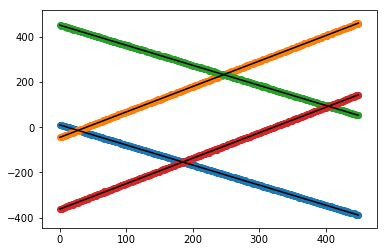

In [8]:
np.set_printoptions(threshold =np.nan)

def clsq(A, dim):
    #’’’CLSQ solves the constrained least squares problem
    #A * [c n]’ = 0 subject to norm(n,2) = 1
    #len(n) = dim
    #’’’
    #reading in the dimensions of A
    m, p = A.shape
    if p < dim + 1:
        #equations are more than unknowns
        print"not enough unknowns"
        return None
    if m < dim:
        #unknowns are more than equations
        print "not enough equations"
        return None
    m = min(m, p)
    #QR decomposition of A
    _, R = numpy.linalg.qr(A, mode="complete")
    #getting the svd transformation of the last two equations of the R matrix
    _, _, VT = numpy.linalg.svd(R[p-dim-1:m, p-dim-1:p])
    n = VT[dim, :]
    #c can be extracted by finding the least square of r and n
    c = numpy.linalg.lstsq(-R[0:p-dim-1, 0:p-dim-1], R[0:p-dim-1, p-dim-1:p].dot(n))[0]
    return c, n

def compute_rectangle_lines(P, Q, r1, S):
    # Reading in the data into P and Q
    px = np.array(P)[:,0]
    Px = np.array(P)[:,0][numpy.newaxis].T
    qx = np.array(Q)[:,0]
    Qx = np.array(Q)[:,0][numpy.newaxis].T
    py = np.array(P)[:,1]
    Py = np.array(P)[:,1][numpy.newaxis].T
    qy = np.array(Q)[:,1]
    Qy = np.array(Q)[:,1][numpy.newaxis].T
    rx = np.array(r1)[:,0]
    Rx = np.array(r1)[:,0][numpy.newaxis].T
    sx = np.array(S)[:,0]
    Sx = np.array(S) [:,0][numpy.newaxis].T
    Ry = np.array(r1)[:,1]
    sy = np.array(S)[:,1]
    Sy = np.array(S) [:,1][numpy.newaxis].T
    Ry = np.array(r1) [:,1][numpy.newaxis].T

    #building the A and B1, B2 matrizes
    A1 = numpy.hstack((numpy.ones(len(Px))[numpy.newaxis].T, numpy.zeros(len(Px))[numpy.newaxis].T,numpy.zeros(len(Px))[numpy.newaxis].T,numpy.zeros(len(Px))[numpy.newaxis].T,Px, Py))
    A2 = numpy.hstack((numpy.zeros(len(Qx))[numpy.newaxis].T, numpy.ones(len(Qx))[numpy.newaxis].T,numpy.zeros(len(Qx))[numpy.newaxis].T,numpy.zeros(len(Qx))[numpy.newaxis].T,Qy,-Qx))
    B1 = numpy.hstack((numpy.zeros(len(Rx))[numpy.newaxis].T,numpy.zeros(len(Rx))[numpy.newaxis].T,numpy.ones(len(Rx))[numpy.newaxis].T, numpy.zeros(len(Rx))[numpy.newaxis].T,Rx, Ry))
    B2 = numpy.hstack((numpy.zeros(len(Sx))[numpy.newaxis].T,numpy.zeros(len(Sx))[numpy.newaxis].T,numpy.zeros(len(Sx))[numpy.newaxis].T, numpy.ones(len(Sx))[numpy.newaxis].T,Sy,-Sx))

    A = numpy.vstack((A1, A2,B1,B2))

    #extracting the c and n values from A using the constrained least square function 
    #(clsq)
    c, n = clsq(A,1)
    print c
    print '*****'
    print n
    c1 = c[0]
    c2 = c[1]
    c3 = c[2]
    c4 = c[3]
    n1= n[0]
    n2= n[1]

    #using the equations for parallel lines to get the values of calculated y
    p = -(c1 + n1*px)/n2
    q = -(c2 - n2*qx)/n1
    r = -(c3 + n1*rx)/n2
    s = -(c4 - n2*sx)/n1

    y1 = px
    y2 = qx
    y3 = rx
    y4 = sx

    plt.plot(y1,p,'black')
    plt.plot(y2,q,'black')
    plt.plot(y3,r,'black')
    plt.plot(y4,s,'black')

    plt.scatter(P[:,0],P[:,1]) #p
    plt.scatter(Q[:,0],Q[:,1]) 
    plt.scatter(r1[:,0],r1[:,1])
    plt.scatter(S[:,0],S[:,1]) #q

    plt.show()
    
P = np.load('data/P2.npy')
Q = np.load('data/Q2.npy')
r1 =np.load ('data/R2.npy')
S = np.load('data/S2.npy')

compute_rectangle_lines(P,Q,r1,S)